https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

https://weather.uwyo.edu/upperair/sounding.html


https://unidata.github.io/MetPy/latest/examples/plots/Simple_Sounding.html#sphx-glr-examples-plots-simple-sounding-py

In [2]:
# Change default to be better for skew-T
plt.rcParams['figure.figsize'] = (9, 9)

In [3]:
# Especifique o número total de linhas no arquivo CSV
total_linhas = sum(1 for linha in open('SBMT_data.txt'))

# Defina o número de linhas a serem ignoradas (últimas 7 linhas)
linhas_a_ignorar = 38

# Calcule o número de linhas a serem lidas
nrows_conta = total_linhas - linhas_a_ignorar

In [4]:
col_names = ['pressure(hPa)', 'height(m)', 'temperature(C)', 'dewpoint(C)', 'RELH(%)','MIXR(g/kg)', 'direction', 'speed(knot)', 'THTA(K)', 'THTE(K)', 'THTV(K)']

df = pd.read_csv('SBMT_data.txt', delim_whitespace = True, skiprows=6, nrows= nrows_conta,names=col_names)
df
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

,pressure(hPa),height(m),temperature(C),dewpoint(C),RELH(%),MIXR(g/kg),direction,speed(knot),THTA(K),THTE(K),THTV(K)
0,935.0,722,22.8,19.0,79,15.02,10,4,301.7,346.2,304.4
1,925.0,811,21.2,18.4,84,14.62,90,6,301.0,344.1,303.6
2,903.0,1020,19.8,17.3,86,13.95,50,8,301.6,342.9,304.1
3,878.0,1263,20.8,14.8,69,12.20,4,10,305.1,341.8,307.3
4,850.0,1544,19.6,14.8,74,12.61,310,12,306.7,344.9,309.0
...,...,...,...,...,...,...,...,...,...,...,...
82,24.5,25212,-49.9,-83.9,1,0.01,96,22,644.2,644.4,644.2
83,23.0,25625,-49.8,-84.2,1,0.01,100,33,656.2,656.3,656.2
84,22.0,25916,-49.8,-84.4,1,0.01,80,28,664.7,664.9,664.7
85,20.8,26283,-49.7,-84.7,1,0.01,86,33,675.7,675.8,675.7


In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pressure(hPa)   87 non-null     float64
 1   height(m)       87 non-null     int64  
 2   temperature(C)  87 non-null     float64
 3   dewpoint(C)     87 non-null     float64
 4   RELH(%)         87 non-null     int64  
 5   MIXR(g/kg)      87 non-null     float64
 6   direction       87 non-null     int64  
 7   speed(knot)     87 non-null     int64  
 8   THTA(K)         87 non-null     float64
 9   THTE(K)         87 non-null     float64
 10  THTV(K)         87 non-null     float64
dtypes: float64(7), int64(4)
memory usage: 7.6 KB


In [6]:
# Upper air data can be obtained using the siphon package, but for this example we will use
# some of MetPy's sample data.

# Drop any rows with all NaN values for T, Td, winds
df = df.dropna(subset=('temperature(C)', 'dewpoint(C)', 'direction', 'speed(knot)'
                       ), how='all').reset_index(drop=True)

In [7]:
df

,pressure(hPa),height(m),temperature(C),dewpoint(C),RELH(%),MIXR(g/kg),direction,speed(knot),THTA(K),THTE(K),THTV(K)
0,935.0,722,22.8,19.0,79,15.02,10,4,301.7,346.2,304.4
1,925.0,811,21.2,18.4,84,14.62,90,6,301.0,344.1,303.6
2,903.0,1020,19.8,17.3,86,13.95,50,8,301.6,342.9,304.1
3,878.0,1263,20.8,14.8,69,12.20,4,10,305.1,341.8,307.3
4,850.0,1544,19.6,14.8,74,12.61,310,12,306.7,344.9,309.0
...,...,...,...,...,...,...,...,...,...,...,...
82,24.5,25212,-49.9,-83.9,1,0.01,96,22,644.2,644.4,644.2
83,23.0,25625,-49.8,-84.2,1,0.01,100,33,656.2,656.3,656.2
84,22.0,25916,-49.8,-84.4,1,0.01,80,28,664.7,664.9,664.7
85,20.8,26283,-49.7,-84.7,1,0.01,86,33,675.7,675.8,675.7


In [8]:
p = df['pressure(hPa)'].values * units.hPa
T = df['temperature(C)'].values * units.degC
Td = df['dewpoint(C)'].values * units.degC
wind_speed = df['speed(knot)'].values * units.knots
wind_dir = df['direction'].values * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)

In [9]:
p

Magnitude,[935.0 925.0 903.0 878.0 850.0 793.2 778.0 765.3 744.0 738.0 700.0 670.0 664.0 613.6 585.0 571.0 562.0 548.0 527.4 507.5 500.0 488.1 469.1 433.5 416.7 400.5 400.0 395.0 384.4 368.7 319.0 312.1 300.0 299.0 269.0 267.0 250.0 241.0 239.6 208.6 200.0 181.0 168.0 163.0 157.0 150.0 148.3 114.0 108.0 101.0 100.0 97.8 95.4 87.0 82.0 81.0 80.6 78.0 75.0 71.0 70.0 64.5 63.0 60.0 59.1 50.0 48.2 47.0 45.0 41.0 39.0 38.9 37.1 36.0 35.0 34.0 32.0 31.0 30.0 28.3 26.0 25.0 24.5 23.0 22.0 20.8 20.3]
Units,hectopascal


In [10]:
wind_speed

Magnitude,[ 4 6 8 10 12 14 13 13 13 13 8 7 6 4 11 14 16 20 18 17 19 19 21 14 16 23 26 28 32 32 32 32 35 34 38 38 40 43 43 36 40 45 48 50 52 54 56 51 50 48 48 48 47 39 20 14 15 22 13 18 18 13 11 1 1 1 6 10 17 21 31 31 30 29 19 15 13 16 15 19 25 19 22 33 28 33 35]
Units,knot


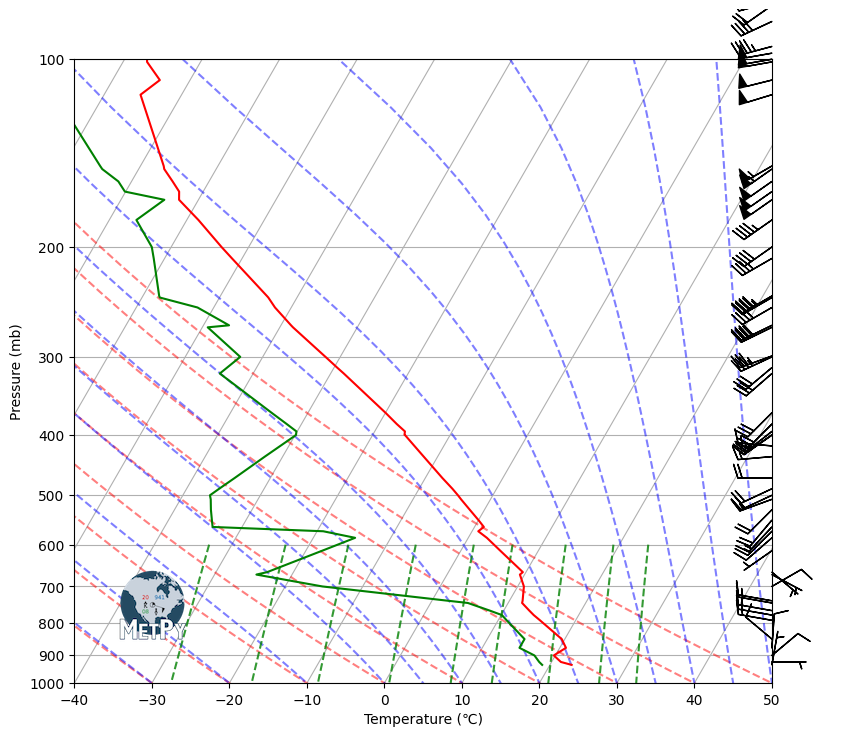

In [11]:
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)

# Set some better labels than the default
skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')
skew.ax.set_ylabel('Pressure (mb)')

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)



# Add the MetPy logo!
fig = plt.gcf()
add_metpy_logo(fig, 115, 100)


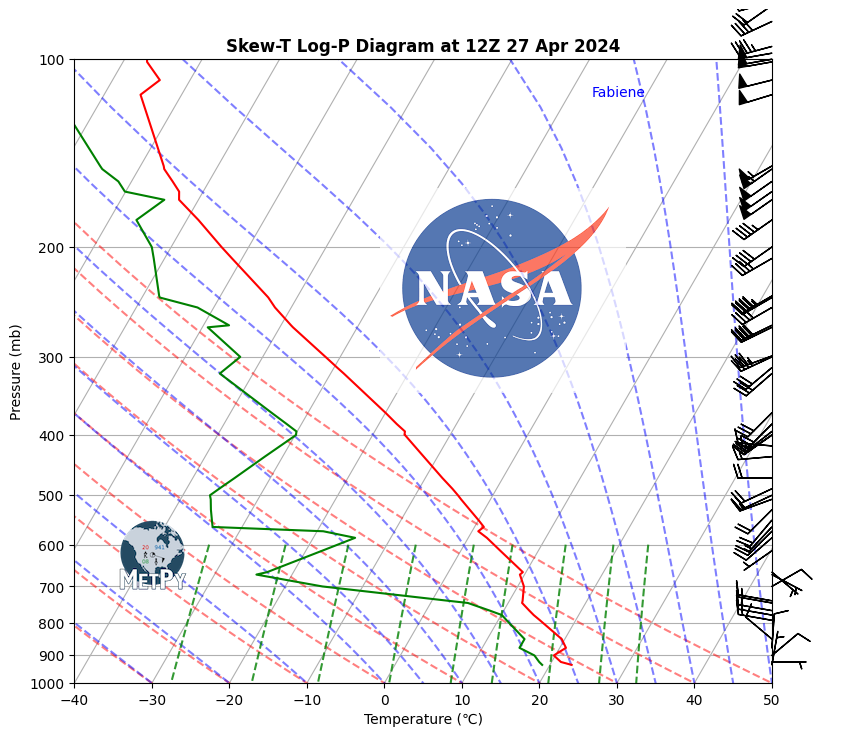

In [12]:

skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)

# Set some better labels than the default
skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')
skew.ax.set_ylabel('Pressure (mb)')

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)


# Adicionar título ao gráfico
plt.title('Skew-T Log-P Diagram at 12Z 27 Apr 2024',fontweight='bold')


# Adicionar texto em um canto da figura
plt.text(0.7, 0.80, 'Fabiene',
         transform=plt.gcf().transFigure, fontsize=10, color='blue')

# Add the MetPy logo!
fig = plt.gcf()
add_metpy_logo(fig, 115, 150)
from matplotlib.image import imread
# Adicionar logotipo da NASA
logo_nasa = imread('nasa.png')
plt.figimage(logo_nasa, 380, 350, resize=False, alpha=0.7)



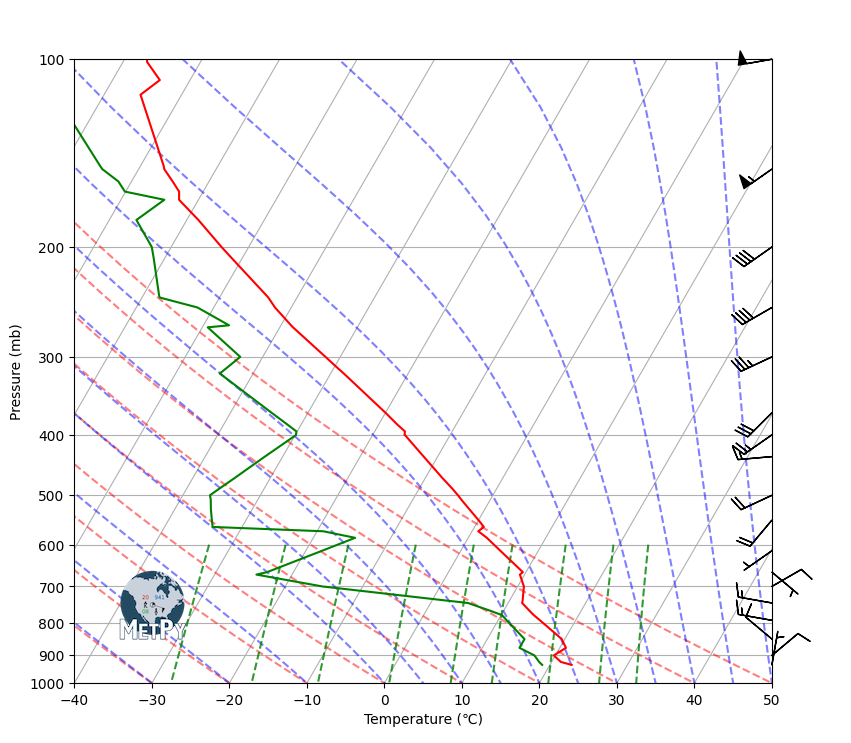

In [13]:
# Example of defining your own vertical barb spacing
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')

# Set some better labels than the default
skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')
skew.ax.set_ylabel('Pressure (mb)')

# Set spacing interval--Every 50 mb from 1000 to 100 mb
my_interval = np.arange(100, 1000, 50) * units('mbar')

# Get indexes of values closest to defined interval
ix = mpcalc.resample_nn_1d(p, my_interval)

# Plot only values nearest to defined interval values
skew.plot_barbs(p[ix], u[ix], v[ix])

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)

# Add the MetPy logo!
fig = plt.gcf()
add_metpy_logo(fig, 115, 100)

# Show the plot
plt.show()

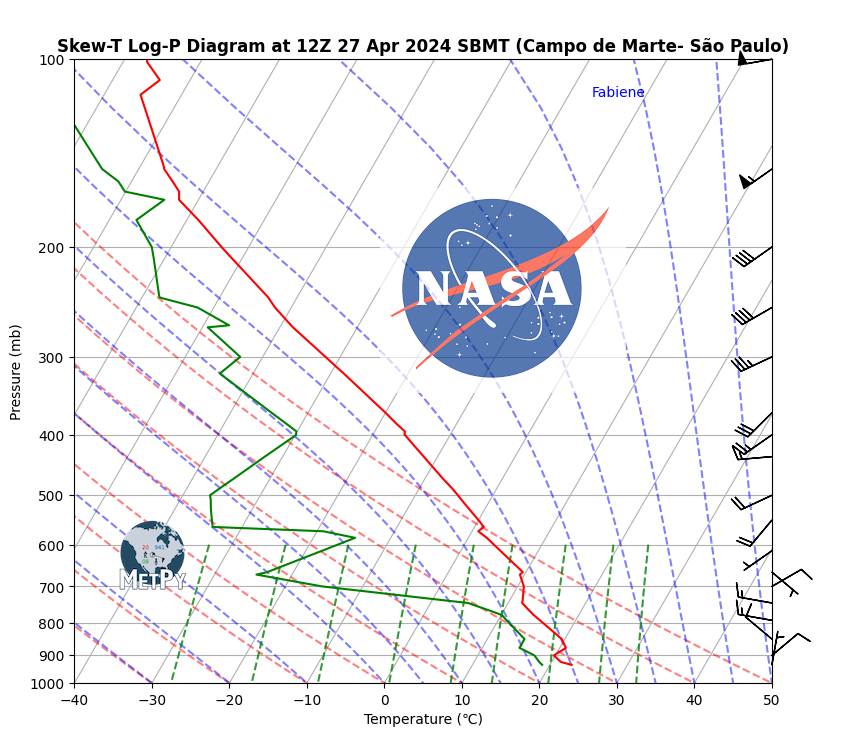

In [14]:

# Example of defining your own vertical barb spacing
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')

# Set some better labels than the default
skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')
skew.ax.set_ylabel('Pressure (mb)')

# Set spacing interval--Every 50 mb from 1000 to 100 mb
my_interval = np.arange(100, 1000, 50) * units('mbar')

# Get indexes of values closest to defined interval
ix = mpcalc.resample_nn_1d(p, my_interval)

# Plot only values nearest to defined interval values
skew.plot_barbs(p[ix], u[ix], v[ix])

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)


# Adicionar título ao gráfico
plt.title('Skew-T Log-P Diagram at 12Z 27 Apr 2024 SBMT (Campo de Marte- São Paulo)',fontweight='bold')


# Adicionar texto em um canto da figura
plt.text(0.7, 0.80, 'Fabiene',
         transform=plt.gcf().transFigure, fontsize=10, color='blue')

# Add the MetPy logo!
fig = plt.gcf()
add_metpy_logo(fig, 115, 150)
from matplotlib.image import imread
# Adicionar logotipo da NASA
logo_nasa = imread('nasa.png')
plt.figimage(logo_nasa, 380, 350, resize=False, alpha=0.7)


# Show the plot
plt.show()


In [15]:
pular= nrows_conta +6
print(pular)

93


In [16]:
df_2 = pd.read_csv('SBMT_data.txt', sep=':', skiprows=pular+1)
display(df_2)

,Station information and sounding indices
Station identifier,SBMT
Station number,83779
Observation time,240427/1200
Station latitude,-23.52
Station longitude,-46.63
Station elevation,722.0
Showalter index,0.46
Lifted index,1.05
LIFT computed using virtual temperature,0.28
SWEAT index,220.61


In [17]:
df_2= df_2.reset_index()

In [18]:
df_2

,index,Station information and sounding indices
0,Station identifier,SBMT
1,Station number,83779
2,Observation time,240427/1200
3,Station latitude,-23.52
4,Station longitude,-46.63
5,Station elevation,722.0
6,Showalter index,0.46
7,Lifted index,1.05
8,LIFT computed using virtual temperature,0.28
9,SWEAT index,220.61


In [30]:
texto_indices = f"""SWEAT: {df_2['Station information and sounding indices'][9]} 
\nShowalter: {df_2['Station information and sounding indices'][6]}
\nLifted:  {df_2['Station information and sounding indices'][7]} 
\nK:  {df_2['Station information and sounding indices'][10]}
\nBulk Richardson\n Number(CAPV):{df_2['Station information and sounding indices'][21]} """

print(texto_indices)

SWEAT:  220.61 

Showalter:  0.46

Lifted:   1.05 

K:   12.90

Bulk Richardson
 Number(CAPV): 0.03 


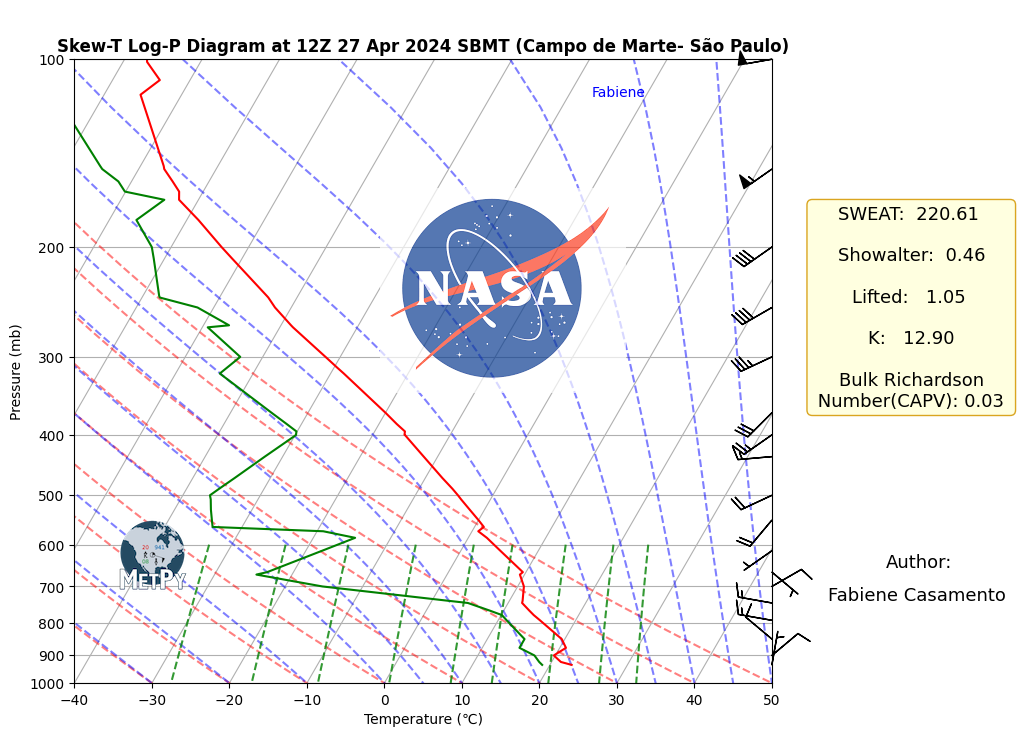

In [49]:

# Example of defining your own vertical barb spacing
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')

# Set some better labels than the default
skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')
skew.ax.set_ylabel('Pressure (mb)')

# Set spacing interval--Every 50 mb from 1000 to 100 mb
my_interval = np.arange(100, 1000, 50) * units('mbar')

# Get indexes of values closest to defined interval
ix = mpcalc.resample_nn_1d(p, my_interval)

# Plot only values nearest to defined interval values
skew.plot_barbs(p[ix], u[ix], v[ix])

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)


# Adicionar título ao gráfico
plt.title('Skew-T Log-P Diagram at 12Z 27 Apr 2024 SBMT (Campo de Marte- São Paulo)',fontweight='bold')


# Adicionar texto em um canto da figura
plt.text(0.7, 0.80, 'Fabiene',
         transform=plt.gcf().transFigure, fontsize=10, color='blue')

# Add the MetPy logo!
fig = plt.gcf()
add_metpy_logo(fig, 115, 150)
from matplotlib.image import imread
# Adicionar logotipo da NASA
logo_nasa = imread('nasa.png')
plt.figimage(logo_nasa, 380, 350, resize=False, alpha=0.7)

plt.text(40, 250, texto_indices, 
                ha = "center",va="center",
                bbox=dict(boxstyle="round",ec='goldenrod',fc='lightyellow'),fontsize = 13)


plt.text(55, 620, 'Author:'
                    ,horizontalalignment='left', verticalalignment='top', fontsize=13)
plt.text(50, 700, 'Fabiene Casamento'
                    ,horizontalalignment='left', verticalalignment='top', fontsize=13)
                    

# Show the plot
plt.show()

fig.savefig('sondagem.png',  dpi=300,bbox_inches='tight', facecolor='w', edgecolor='w',orientation='landscape')